In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
%matplotlib inline




(3000, 4000, 3)
(800, 1500, 3)


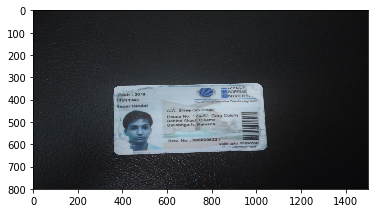

In [52]:
#reading the file
im_path='id.jpg'
img=cv2.imread(im_path)
print (img.shape)
img=cv2.resize(img,(1500,800))
print (img.shape)
plt.imshow(img)
plt.show()

In [14]:
image blurring

SyntaxError: invalid syntax (<ipython-input-14-bda92e29a0ad>, line 1)

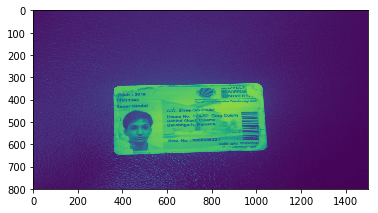

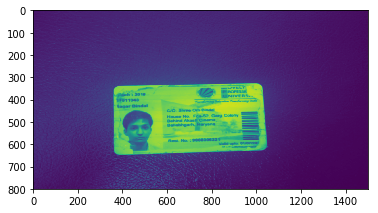

(800, 1500)


In [53]:
# image blurring :: bluring the background so that it will make difference beteen the image and the background
orig=img.copy()
gray=cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()
blurred=cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred)
plt.show()
print (blurred.shape)


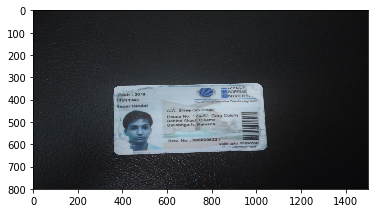

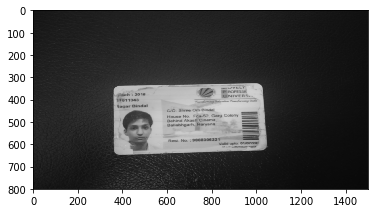

In [54]:
#coverting the background color to grey
regen= cv2.cvtColor(blurred,cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()
plt.imshow(regen)
plt.show()

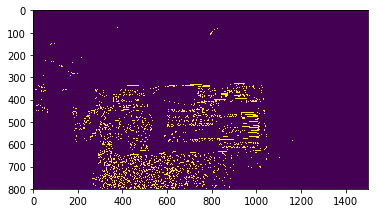

In [55]:
#Edge detection 
edged=cv2.Canny(blurred,0,50)
orig_edged=edged.copy()
plt.imshow(orig_edged)
plt.show()

In [83]:
#finding the contour of image i.e. contour extruction
_,contours,_=cv2.findContours(edged,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
print (len(contours))
contours=sorted(contours,reverse=True,key = cv2.contourArea)[:10]

1682


In [84]:
#finding the best contour throughout as image is polygon of 4 so when it will equal to 4
for c in contours:
    p=cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,0.02*p,True)
    
    if (len(approx))==4:
        target=approx
        break
        
print(target.shape)

(4, 1, 2)


In [85]:
#reordered the targeted contour
def reorder(h):
    h=h.reshape((4,2))
    print(h)
    
    hnew=np.zeros((4,2),dtype=np.float32)
    
    add=h.sum(axis=1)
    hnew[3]=h[np.argmin(add)]
    hnew[1]=h[np.argmax(add)]
    
    diff=np.diff(h,axis=1)
    hnew[0]=h[np.argmin(diff)]
    hnew[2]=h[np.argmax(diff)]
    
    return hnew

In [86]:
reorderd=reorder(target)
print('-----------------------')
print (reorderd)

[[1020  412]
 [ 994  393]
 [ 723  400]
 [ 996  397]]
-----------------------
[[1020.  412.]
 [1020.  412.]
 [ 723.  400.]
 [ 723.  400.]]


In [87]:
#setting the dimenion of contour images
input_represent=reorderd
output_map=np.float32([[0,0],[800,0],[800,800],[0,800]])


In [88]:
#transform the images from 
M=cv2.getPerspectiveTransform(input_represent,output_map)
ans= cv2.warpPerspective(previous dimensionsorig,M,(1200,1200))

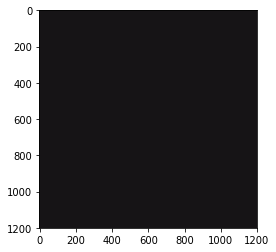

In [89]:
#final output
plt.imshow(ans)
plt.show()